In [14]:
from deepface import DeepFace

In [15]:
import os
import cv2
from IPython.display import display
import matplotlib.pyplot as plt

image_dir = '/home/mwilkers1/Documents/Projects/Datathons/deepface-challenge/faceimages'
faceimages = []

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        faceimages.append(image)


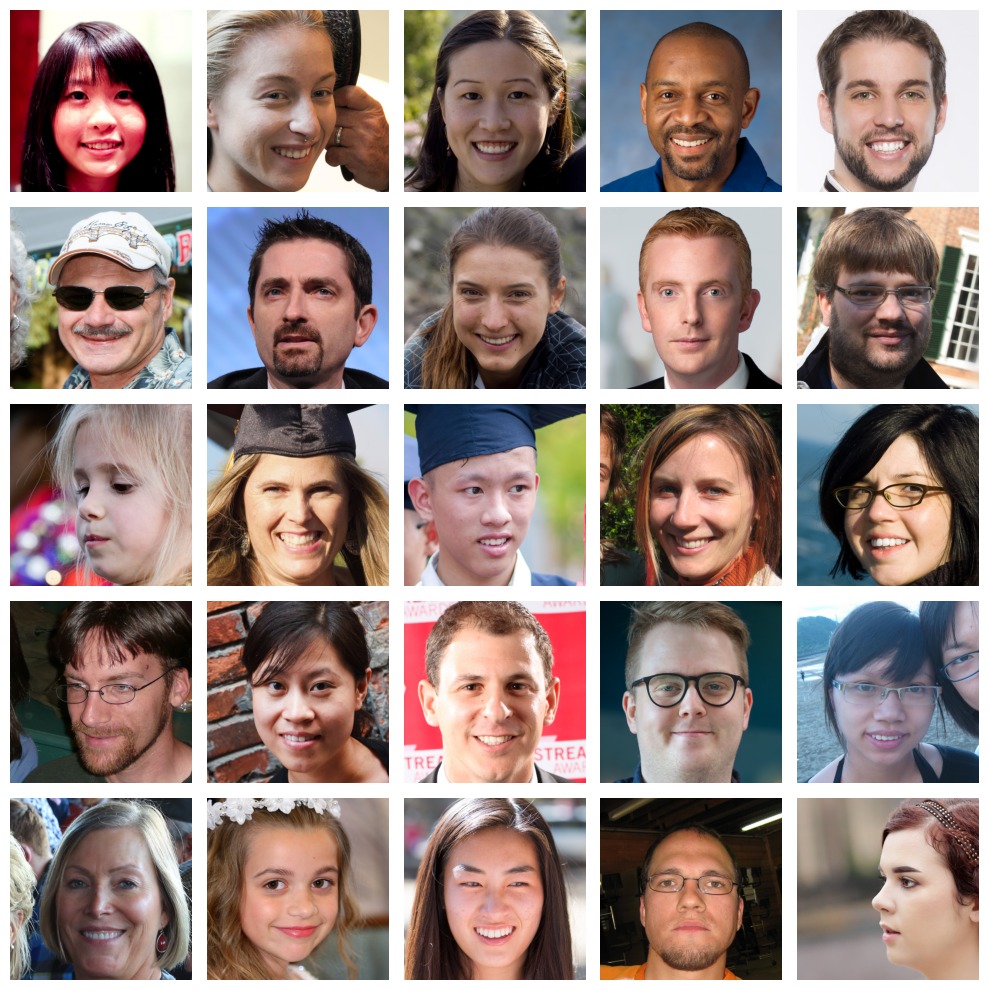

In [16]:
# Create a figure and axes with a grid layout of 5 rows and 5 columns
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Flatten the axes array to iterate over it easily
axes = axes.flatten()

# Loop through the faceimages list and plot each image on the corresponding axis
for i, image in enumerate(faceimages[:25]):
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the photomontage
plt.show()


In [17]:
import pandas as pd
from deepface import DeepFace

# Create a list to store the predictions
predictions = []

# Loop through each image in the faceimages list
for image in faceimages:
    # Perform the prediction using DeepFace
    result = DeepFace.analyze(image, actions=['gender', 'age', 'race'], enforce_detection=False)
    
    # Extract the predicted gender, age/ethnicity, and age from the result
    gender = result[0]['gender']
    age_ethnicity = result[0]['race']
    age = result[0]['age']
    
    # Append the predictions to the list
    predictions.append({'Gender': gender, 'Race/Ethnicity': age_ethnicity, 'Age': age})

# Create a dataframe from the predictions list
df_predictions = pd.DataFrame(predictions)

# Print the dataframe
print(df_predictions)


Action: race: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]  

                                                Gender  \
0    {'Woman': 71.99474573135376, 'Man': 28.0052572...   
1    {'Woman': 3.188711404800415, 'Man': 96.8112885...   
2    {'Woman': 78.93328666687012, 'Man': 21.0667163...   
3    {'Woman': 0.00011239695822951035, 'Man': 99.99...   
4    {'Woman': 0.00015127600363484817, 'Man': 99.99...   
..                                                 ...   
105  {'Woman': 0.013152977044228464, 'Man': 99.9868...   
106  {'Woman': 28.633302450180054, 'Man': 71.366697...   
107  {'Woman': 0.002035227225860581, 'Man': 99.9979...   
108  {'Woman': 1.2657110579311848, 'Man': 98.734283...   
109  {'Woman': 94.60658431053162, 'Man': 5.39341568...   

                                        Race/Ethnicity  Age  
0    {'asian': 99.96625185012817, 'indian': 0.00065...   29  
1    {'asian': 0.42595414189721, 'indian': 0.473472...   29  
2    {'asian': 82.68356323242188, 'indian': 3.50468...   31  
3    {'asian': 1.0408530591241028e-10, 'indian': 1.... 

In [18]:
# Define the filename for the CSV file
csv_filename = 'predictions.csv'

# Add the 'filename' column to the DataFrame
df_predictions['filename'] = [os.path.basename(filename) for filename in os.listdir(image_dir) if filename.endswith('.jpg') or filename.endswith('.png')]

# Replace missing predictions with 'unknown' and -1
df_predictions.fillna({'Gender': 'unknown', 'Race/Ethnicity': 'unknown', 'Age': -1}, inplace=True)

# Get the gender and race with the highest confidence for each prediction
df_predictions['Gender'] = df_predictions['Gender'].apply(lambda x: max(x, key=lambda k: x[k]))
df_predictions['Race/Ethnicity'] = df_predictions['Race/Ethnicity'].apply(lambda x: max(x, key=lambda k: x[k]))

# Reorder the columns
df_predictions = df_predictions[['filename', 'Gender', 'Race/Ethnicity', 'Age']]

# Write the DataFrame to a CSV file
df_predictions.to_csv(csv_filename, index=False)


In [19]:
df_predictions.head()

,filename,Gender,Race/Ethnicity,Age
0,00055.png,Woman,asian,29
1,00408.png,Man,white,29
2,00275.png,Woman,asian,31
3,00265.png,Man,black,42
4,00424.png,Man,white,23
